In [6]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
#Read Data Set
df=pd.read_csv('airline_passengers.csv',parse_dates=True,index_col='Month')
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


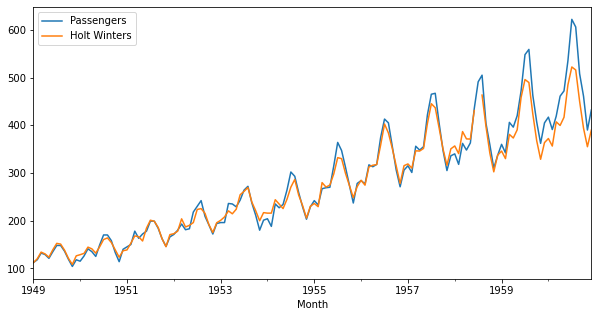

In [8]:
#Number of Test Samples
N_test=30

#Division of the data into train and test sets
train=df[:-N_test]
test=df[-N_test:]


#Create Holt Winters model
hw=ExponentialSmoothing(train['Passengers'], trend='add',seasonal='add',freq='MS', seasonal_periods=12)

#Fit model
res_hw=hw.fit()

#Get masks for train and test indices in df
train_idx=df.index<=df.index[-N_test]
test_idx=df.index>df.index[-N_test]

#Put fitted and predicted values to Holt Winters Column of df
df.loc[train_idx,'Holt Winters']=res_hw.fittedvalues
df.loc[test_idx,'Holt Winters']=res_hw.forecast(N_test)

#Plot initial data and Holt Winters model of the data
df[['Passengers', 'Holt Winters']].plot(figsize=(10,5));

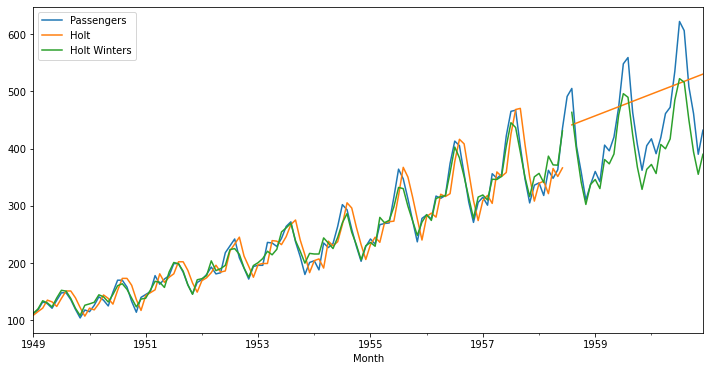

In [9]:
# Create Holt Model and fit the data
holt=Holt(train['Passengers'])
res_h=holt.fit()

#Put fitted and predicted values to Holt Column of df
df.loc[train_idx,'Holt']=res_h.fittedvalues
df.loc[test_idx,'Holt']=res_h.forecast(N_test)

df[['Passengers', 'Holt','Holt Winters']].plot(figsize=(12,6));

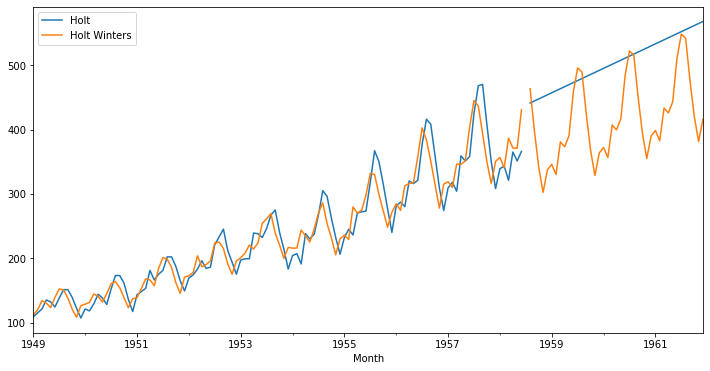

In [5]:
# Add future forecast to df 

# Create new indices
new_ind=np.arange('1961-01-01', '1962-01-01', dtype='datetime64[M]')

# create template data for the forecast
new_data=np.zeros((12,3))

# create new df for the forecast from the template 
new_df=pd.DataFrame(new_data,index=new_ind,columns=['Passengers',	'Holt',	'Holt Winters'])
new_df=new_df.rename_axis('Month')

# Concatenate initial df and new df
df_ext=pd.concat([df,new_df])

# Put Future forecasts by Holt and Holt Winters to new extended df
df_ext.loc['1961-01-01':'1962-01-01','Holt']=res_h.forecast(N_test+12)
df_ext.loc['1961-01-01':'1962-01-01','Holt Winters']=res_hw.forecast(N_test+12)

#Plot the result
df_ext[['Holt','Holt Winters']].plot(figsize=(12,6));

In [10]:
df_ext.tail(20)

,Passengers,Holt Winters,Holt
Month,,,
1960-05-01,472.0,416.773892,507.857928
1960-06-01,535.0,484.636106,511.025664
1960-07-01,622.0,522.181666,514.193401
1960-08-01,606.0,515.889613,517.361137
1960-09-01,508.0,450.144518,520.528873
1960-10-01,461.0,393.950166,523.696609
1960-11-01,390.0,354.975060,526.864345
1960-12-01,432.0,389.962091,530.032081
1961-01-01,0.0,398.518598,533.199817
